In [177]:
import xml.etree.ElementTree
import cv2
import glob
import os
import numpy as np
from openslide import OpenSlide

xml_list = sorted(glob.glob(
    '/Users/nathaning/Dropbox/projects/semantic_pca/data/annotations/*.xml'))

%matplotlib inline
from matplotlib import pyplot as plt

In [100]:
GradeCode = {
    '3+3': 1,
    '4+4': 2,
    '4+5': 3,
    'BN':  4,
    'ST':  5
}

In [175]:
# for xmlpath in xml_list:
xmlpath = xml_list[9]
print os.path.basename(xmlpath)
e = xml.etree.ElementTree.parse(xmlpath).getroot()
regions = e.findall('Annotation')[0].findall('Regions')[0].findall('Region')

contours = []
for region in regions:
    grade = region.attrib['Text']
    area = region.attrib['AreaMicrons']
    vertices = region.findall('Vertices')[0].findall('Vertex')
    contours.append(np.asarray([(int(vert.attrib['X'])/16, int(vert.attrib['Y'])/16) 
                     for vert in vertices], dtype=np.int32))
    print '\tGrade: {} Area: {}, N verts: {}'.format(
        grade, area, len(XY))

1304718.xml
	Grade: 3+3 Area: 9298823.4, N verts: 387
	Grade: BN Area: 24176490.5, N verts: 387


(4000, 4000) 0.0 155.0


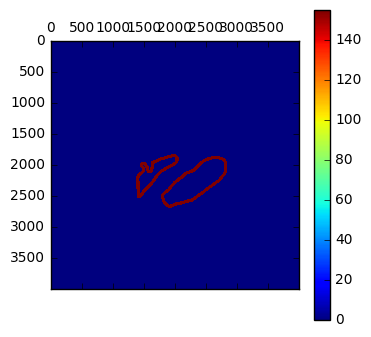

In [176]:
img = np.zeros((4000,4000))

cv2.drawContours(img, contours, -1, (155), 50)

print img.shape, img.min(), img.max()
plt.matshow(img)
plt.colorbar()

In [120]:
help(cv2.drawContours)

Help on built-in function drawContours in module cv2:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> None



In [124]:
xy_np = np.asarray(XY)

In [148]:
xy_np.transpose()

array([[ 432,  435,  435,  446,  467,  476,  495,  502,  509,  511,  520,
         525,  530,  539,  550,  564,  569,  578,  592,  599,  611,  620,
         622,  629,  634,  638,  641,  650,  662,  671,  689,  701,  715,
         722,  731,  743,  747,  761,  775,  784,  787,  796,  805,  814,
         824,  833,  837,  842,  849,  861,  868,  877,  898,  907,  923,
         939,  965,  979, 1004, 1034, 1055, 1062, 1074, 1083, 1092, 1111,
        1143, 1168, 1175, 1182, 1185, 1189, 1192, 1201, 1210, 1212, 1215,
        1226, 1243, 1252, 1261, 1268, 1270, 1275, 1280, 1289, 1291, 1300,
        1305, 1310, 1312, 1319, 1328, 1335, 1347, 1356, 1361, 1365, 1372,
        1379, 1381, 1391, 1395, 1400, 1402, 1409, 1414, 1418, 1421, 1423,
        1423, 1425, 1428, 1428, 1428, 1430, 1432, 1435, 1435, 1437, 1439,
        1444, 1446, 1449, 1451, 1455, 1462, 1462, 1467, 1474, 1476, 1483,
        1486, 1490, 1493, 1497, 1499, 1504, 1506, 1509, 1513, 1518, 1518,
        1518, 1523, 1527, 1527, 1530, 

In [136]:
xy_np[:,1].max()

1525